# Converting from NQR frequencies to quadrupole coupling constant and asymmetry parameter

In [1]:
# Load "autoreload" extension so that code can change; set it so modules are reloaded before execution
%load_ext autoreload
%autoreload 2

In [2]:
from fractions import Fraction as Frac
import itertools
import numpy as np
import numpy.linalg as la
import nqr.core as nqr
import matplotlib.pyplot as plt
from scipy.constants import h, e
from scipy.special import comb

def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

As an example, we take the NQR frequencies for TaP, which were determined in 2017

{% raw %}{% cite yasuoka2017 %}{% endraw %}:

In [3]:
f_exp = [28.95, 36.08, 56.67] # Measured NQR frequencies (MHz)
Q = 3.71e-28 # Ta quadrupole moment (m^2)
I = 7/2

The asymmetry parameter $ \eta $ can be determined from ratios of the frequencies as a function of $ \eta $. Consider the quadrupolar Hamiltonian normalized with respect to $ \nu_Q = 3eV_{zz}Q/(4I(2I-1)h) $:

\begin{align}
    H_Q &= \frac{eV_{zz}Q}{4I(2I-1)}
          \left[
          3I_z^2 - I^2 + \eta(I_x^2 - I_y^2)
          \right]
        \\
        &= \frac{h}{3}
           \left[
               3I_z^2 - I^2 + \eta(I_x^2 - I_y^2)
           \right] \nu_Q.
\end{align}

The frequencies associated with energy eigenvalues of the normalized Hamiltonian can be determined numerically. We create a dataset of frequencies as a function of $ \eta $:

[-5.04097203 -5.04097203 -2.96970689 -2.96970689  1.00834484  1.00834484
  7.00233409  7.00233409]
6.0


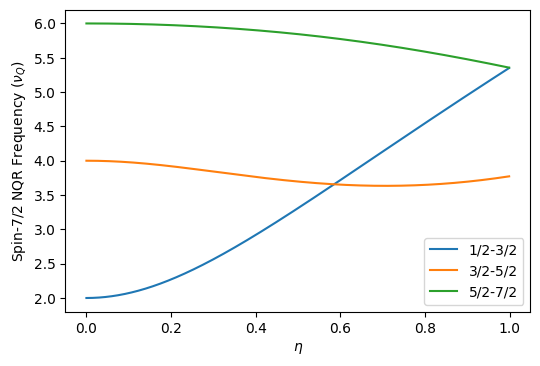

In [4]:
I = 7/2
eta = np.arange(0, 1, 0.001)
m = int(2*I + 1)
N = comb(m/2, 2) if m%2 == 0 else comb(m, 2) # Number of unique frequencies
H = nqr.get_norm_H(I, eta) # Creates a Hamiltonian for each eta
E, _ = la.eig(H) # Find eigenvaulues of all Hamiltonians at once
f_nuQ = np.sort(np.real(E))/h # Sort and convert to frequencies
print(f_nuQ[100, :])
fig, ax = plt.subplots(dpi=100)
f = {}
print(N)
for s in np.arange(1/2, I):
    m1 = s
    m2 = s + 1
    label = '{}-{}'.format(Frac(m1), Frac(m2))
    f_i = f_nuQ[:, int(2*m2)] - f_nuQ[:, int(2*m1)]
    f[label] = f_i
    plt.plot(eta, f_i, label=label)
# # f_12_32 = f_nuQ[:, int(2*3/2)] - f_nuQ[:, int(2*1/2)] # 1/2 --> 3/2
# # #f_32_52 = f_nuQ[:, int(2*5/2)] - f_nuQ[:, int(2*3/2)] # 3/2 --> 5/2
# # #f_52_72 = f_nuQ[:, int(2*7/2)] - f_nuQ[:, int(2*5/2)] # 5/2 --> 7/2
# # ax.plot(eta, f_12_32, label='1/2-3/2')
# # ax.plot(eta, f_32_52, label='3/2-5/2')
# # ax.plot(eta, f_52_72, label='5/2-7/2')
ax = plt.gca()
ax.set(ylabel='Spin-{} NQR Frequency ($\\nu_Q$)'.format(Frac(I)))
ax.set(xlabel='$\eta$')
ax.legend();
# # fig.tight_layout()

These are the dominant transition frequencies for spin-7/2 nuclei. The ratios of these computed frequencies must be equivalent to the ratios of the measured frequencies. Using this, $ \eta $ can be determined by direct comparison.

In [5]:
f_nuQ_rat = f['5/2-7/2']/f['1/2-3/2']
f_exp_rat = f_exp[2]/f_exp[0]
index, _ = find_nearest(f_nuQ_rat, f_exp_rat) # Find index where experimental ratio best matches computed ratio
print('Experimental eta is %f' % eta[index])

Experimental eta is 0.424000


Then the quadrupole coupling constant, which is usually equal or proportional to $ \nu_Q $, can be determine by direct comparison of $ \nu_Q $ at the determined value of $ \eta $.

{% bibliography --cited %}